In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Cargar el conjunto de datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Dimensiones de la entrada y la representación latente
input_dim = x_train.shape[1]
encoding_dim = 28
# Definir el codificador
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Definir el decodificador
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Crear el modelo autoencoder
autoencoder = Model(input_img, decoded)

# Crear el modelo codificador
encoder = Model(input_img, encoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenar el modelo
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Obtener las representaciones latentes
encoded_imgs = encoder.predict(x_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3953 - val_loss: 0.1903
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1810 - val_loss: 0.1573
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1530 - val_loss: 0.1376
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1356 - val_loss: 0.1254
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1245 - val_loss: 0.1177
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1177 - val_loss: 0.1124
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1127 - val_loss: 0.1085
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1090 - val_loss: 0.1055
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1066 - val_loss: 0.1034
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1044 - val_loss: 0.1017
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1029 - val_loss: 0.1006
E

In [2]:
print("Dimensión de la entrada original:", x_test.shape[1])
print("Dimensión de la representación latente:", encoded_imgs.shape[1])

Dimensión de la entrada original: 784
Dimensión de la representación latente: 28


In [3]:
encoded_imgs

array([[ 7.8882723,  4.8420224,  0.       , ...,  5.1653194,  5.7645755,
         2.2917542],
       [ 4.4877663,  8.107101 ,  1.0650556, ...,  5.722321 ,  3.7149143,
         5.1608486],
       [ 3.578129 ,  7.56227  ,  4.9795675, ...,  5.4062943,  1.2710354,
         3.834897 ],
       ...,
       [ 2.8928485, 11.123884 ,  8.282945 , ..., 12.566905 , 11.603539 ,
         8.16768  ],
       [ 3.985901 , 10.66531  ,  7.7827563, ...,  6.877186 ,  2.7986498,
         8.027608 ],
       [ 9.616556 , 18.389889 , 17.429138 , ..., 17.933054 , 15.719002 ,
        10.097029 ]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


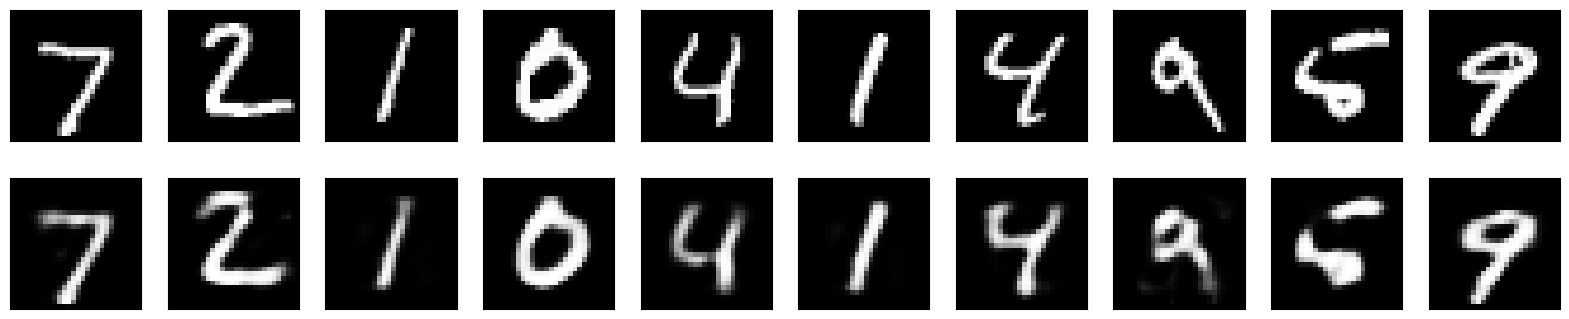

In [4]:
import matplotlib.pyplot as plt
n = 10
decoded_imgs = autoencoder.predict(x_test[:n])

plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()